Step 1:Generate a dataset

In [35]:
import pandas as pd
import numpy as np

np.random.seed(42)

area = np.random.randint(500,4000,500)
price = area * 50 + np.random.randint(10000, 50000, 500)

df = pd.DataFrame({"Area in sqft":area,
                  "Price (Rs.)":price})

Step 2: Load and preprocess data

In [37]:
df

,Area in sqft,Price (Rs.)
0,3674,198477
1,1360,107749
2,1794,115038
3,1630,93991
4,1595,116986
...,...,...
495,2697,144967
496,2861,171985
497,3117,179084
498,3913,243978


In [38]:
print(df.isnull().sum())
print()
print(df.describe())
print()
print(df.info())

Area in sqft    0
Price (Rs.)     0
dtype: int64

       Area in sqft    Price (Rs.)
count     500.00000     500.000000
mean     2319.38400  145873.390000
std      1003.67328   51517.502173
min       501.00000   37555.000000
25%      1478.75000  103997.000000
50%      2297.50000  145003.000000
75%      3208.00000  183856.250000
max      3999.00000  246397.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Area in sqft  500 non-null    int32
 1   Price (Rs.)   500 non-null    int32
dtypes: int32(2)
memory usage: 4.0 KB
None


In [39]:
print(df.shape)
print(df.head)

(500, 2)
<bound method NDFrame.head of      Area in sqft  Price (Rs.)
0            3674       198477
1            1360       107749
2            1794       115038
3            1630        93991
4            1595       116986
..            ...          ...
495          2697       144967
496          2861       171985
497          3117       179084
498          3913       243978
499          2852       153446

[500 rows x 2 columns]>


Step 3:Exploratory data analysis

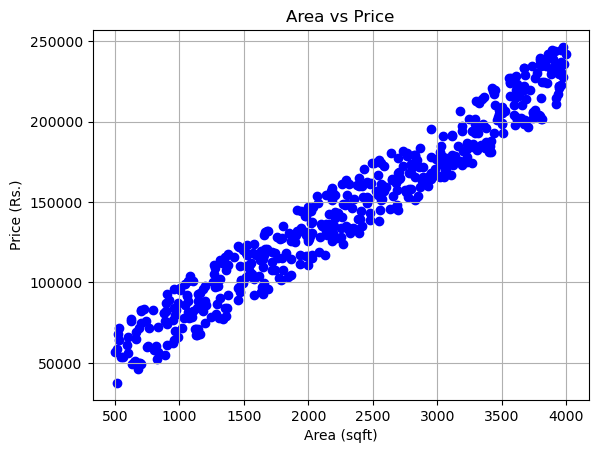

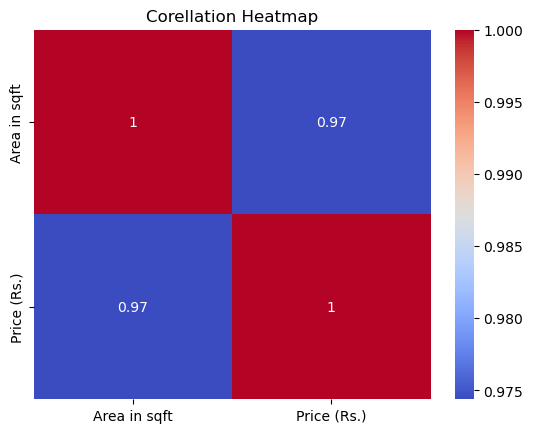

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#scatter plot
plt.scatter(df["Area in sqft"],df["Price (Rs.)"],color="blue")
plt.title("Area vs Price")
plt.grid(True)
plt.xlabel("Area (sqft)")
plt.ylabel("Price (Rs.)")
plt.show()

#Corellation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Corellation Heatmap")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = df["Area in sqft"].values.reshape(-1,1)
Y = df["Price (Rs.)"]

X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

model = LinearRegression()
model.fit(X_train,Y_train)

coefficient = model.coef_
intercept = model.intercept_

print(f"Coefficient: {coefficient}\nIntercept: {intercept}")

Coefficient: [49.98842521]
Intercept: 30031.7913468724


Model Evaluation

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("Mse:",mean_squared_error(Y_test,y_pred))
print("R2 score:",r2_score(Y_test,y_pred))

Mse: 119663576.79487449
R2 score: 0.9545784448777633


Step 6: Prediction and Visualization

In [46]:
#predictingf price using the linear regression model

input_area = int(input("Enter a area (in sqft): "))
new_area = [[input_area]]
predicted_price = model.predict(new_area)
print(f"The predicted for {input_area}sqft ₹:{predicted_price[0]:,.2f}")

Enter a area (in sqft):  2500


The predicted for 2500sqft ₹:155,002.85


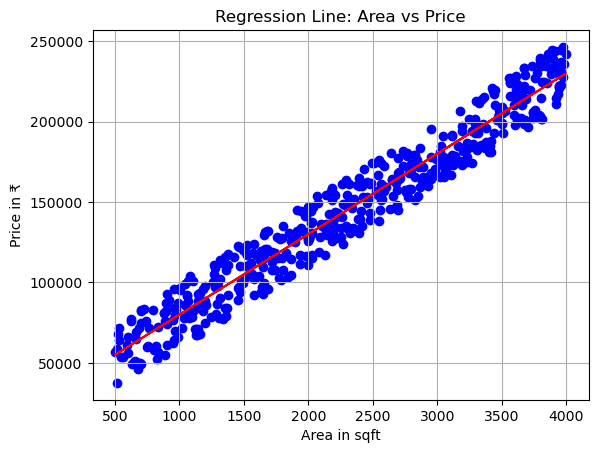

In [47]:
#Plot regression in line
plt.scatter(X,Y,color="blue")
plt.plot(X,model.predict(X),color="red") #Regression line
plt.title("Regression Line: Area vs Price")
plt.xlabel("Area in sqft")
plt.ylabel("Price in ₹")
plt.grid(True)
plt.show()